**Chapter 12 Q2**<br>
Author: 314657018 統計碩1 陳葳芃Andy
===

**Suppose that we have four observations, for which we compute a dissimilarity matrix, given by:**<br>


\begin{bmatrix}
1 & 0.3 & 0.4 & 0.7 \\
0.3 & 1 & 0.5 & 0.8 \\
0.4 & 0.5 & 1 & 0.45 \\
0.7 & 0.8 & 0.45 & 1
\end{bmatrix}


**For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.**


**Q2-(a)**
==
**On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.**

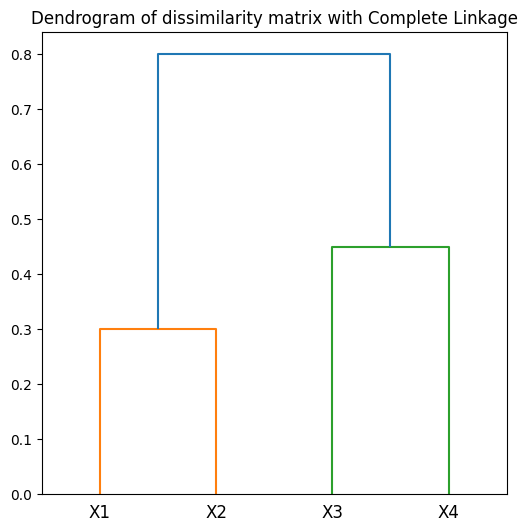

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# 不相似度矩陣
X = np.array([
    [ 0,  0.3,  0.4,  0.7 ],
    [0.3,   0,  0.5,  0.8 ],
    [0.4,  0.5,   0,  0.45],
    [0.7,  0.8,  0.45,  0 ]
])

dist = X
dist_vec = squareform(dist, checks=False) # 轉換成 condensed vector 給 linkage()
Z = linkage(dist_vec, method="complete") # 階層分群 (complete linkage)
labels = ["X1","X2","X3","X4"] # 畫 dendrogram，指定變數名稱
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(Z, labels=labels, ax=ax)
ax.set_title("Dendrogram of dissimilarity matrix with Complete Linkage")
plt.show()


**Q2-(b)**
==
**Repeat (a), this time using single linkage clustering.**

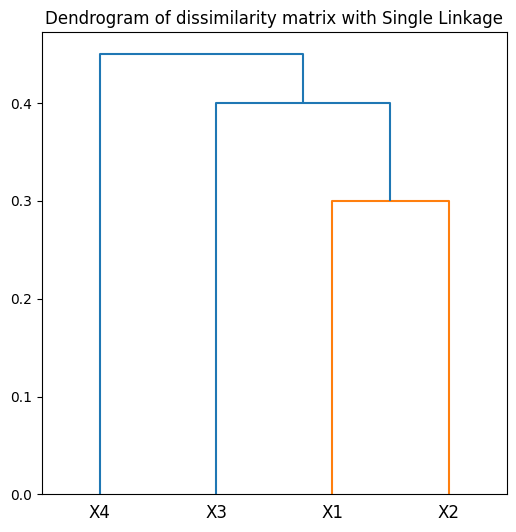

In [2]:
dist = X
dist_vec = squareform(dist, checks=False) # 轉換成 condensed vector 給 linkage()
Z = linkage(dist_vec, method="single")
labels = ["X1","X2","X3","X4"] # 畫 dendrogram，指定變數名稱
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(Z, labels=labels, ax=ax)
ax.set_title("Dendrogram of dissimilarity matrix with Single Linkage")
plt.show()

**Q2-(c)**
==
**Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?**


<font color=#0000FF> **ans:**<br>
For the 2 clusters result, I might define observation X1 and X2 in cluster1, X3 and X4 in cluster2.</font>


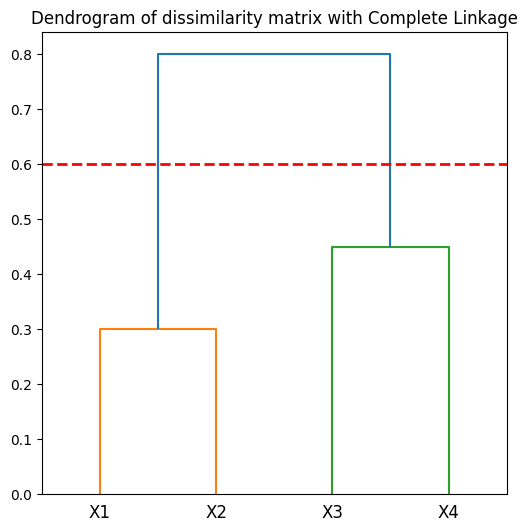

In [3]:
dist = X
dist_vec = squareform(dist, checks=False) # 轉換成 condensed vector 給 linkage()
Z = linkage(dist_vec, method="complete") # 階層分群 (complete linkage)
labels = ["X1","X2","X3","X4"] # 畫 dendrogram，指定變數名稱
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(Z, labels=labels, ax=ax)
ax.axhline(y=0.6, color='red', linestyle='--', linewidth=2)
ax.set_title("Dendrogram of dissimilarity matrix with Complete Linkage")
plt.show()



**Q2-(d)**
==
**Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?**

<font color=#0000FF> **ans:**<br>
For the 2 clusters result, I might define observation X1, X2 and X3 in cluster1, X4 in cluster2.</font>

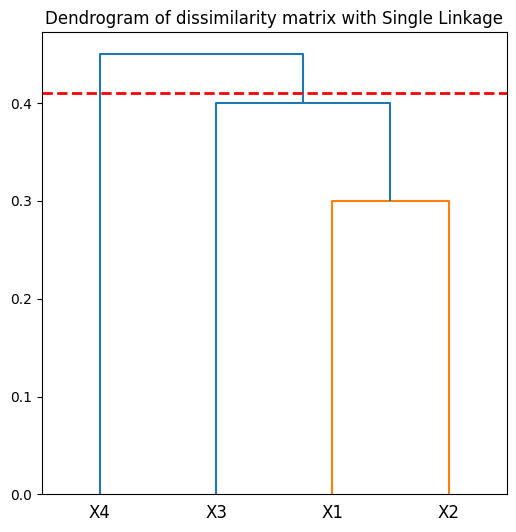

In [4]:
dist = X
dist_vec = squareform(dist, checks=False) # 轉換成 condensed vector 給 linkage()
Z = linkage(dist_vec, method="single") # 階層分群 (complete linkage)
labels = ["X1","X2","X3","X4"] # 畫 dendrogram，指定變數名稱
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(Z, labels=labels, ax=ax)
ax.axhline(y=0.41, color='red', linestyle='--', linewidth=2)
ax.set_title("Dendrogram of dissimilarity matrix with Single Linkage")
plt.show()

**Q2-(e)**
==
**It is mentioned in this chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.**

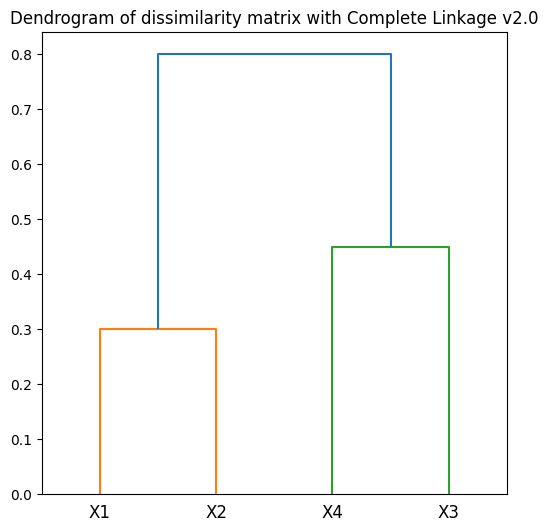

In [5]:
Y = np.array([
    [1,    0.7,  0.4,  0.3 ],
    [0.7,  1,    0.45,  0.8 ],
    [0.4,  0.45,  1,    0.5],
    [0.3,  0.8,  0.5, 1   ]
])

dist = Y
dist_vec = squareform(dist, checks=False)
Z = linkage(dist_vec, method="complete")
labels = ["X1","X4","X3","X2"]
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(Z, labels=labels, ax=ax)
ax.set_title("Dendrogram of dissimilarity matrix with Complete Linkage v2.0")
plt.show()

**Appendix: Code for testing 測試用code**
==

In [ ]:
X = np.array([
    [1,    0.3,  0.4,  0.7 ],
    [0.3,  1,    0.5,  0.8 ],
    [0.4,  0.5,  1,    0.45],
    [0.7,  0.8,  0.45, 1   ]
])
corD = 1 - X
hc_cor = HClust(linkage='complete',
distance_threshold=0, n_clusters=None, metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)

labels = ["X1","X2","X3","X4"]
fig, ax = plt.subplots(figsize=(6,6))
dendrogram(linkage_cor, ax=ax)
ax.set_title("Complete Linkage with Correlation-Based Dissimilarity")